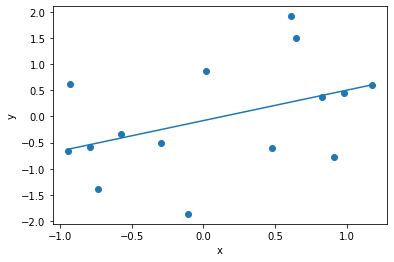

In [1]:
import math
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
# seed random number generator
np.random.seed(666)
# prepare data
x = np.random.randn(15)
y = x + np.random.randn(15)
# plot x and y
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
# np.savetxt("x4.csv", x, delimiter=",")

In [3]:
# np.savetxt("y4.csv", y, delimiter=",")

In [4]:

# all_x = pd.read_csv("all_x.csv", header=None)
# all_x_array = np.array(all_x)
# all_y = pd.read_csv("all_y.csv", header=None)
# all_y_array = np.array(all_y)
# df = pd.DataFrame({"x" : all_x_array.flatten(), "y" : all_y_array.flatten()})
# df.to_csv("all_xy.csv", index=False)
# df

In [5]:
# x_list=['x1.csv', 'x2.csv', 'x3.csv', 'x4.csv']
# for itw in x_list:
#     df = pd.read_csv(itw)
#     df.to_csv('all_x.csv', mode='a', index= False)
# y_list=['y1.csv', 'y2.csv', 'y3.csv', 'y4.csv']
# for itw in y_list:
#     df = pd.read_csv(itw)
#     df.to_csv('all_y.csv', mode='a', index= False)

In [6]:
all_x = pd.read_csv("all_x.csv", header=None)
all_x_array = np.array(all_x)
len(all_x)

60

In [7]:
all_y = pd.read_csv("all_y.csv", header=None)
all_y_array = np.array(all_y)
len(all_y)

60

In [8]:
corr_all_points, _ = pearsonr(all_x_array.flatten(), all_y_array.flatten())
print("Pearsons correlation of all x's and y's: %.3f" % corr_all_points)

Pearsons correlation of all x's and y's: 0.612


In [9]:
x1 = pd.read_csv("x1.csv", header=None)
x1_array = np.array(x1)
x2 = pd.read_csv("x2.csv", header=None)
x2_array = np.array(x2)
x3 = pd.read_csv("x3.csv", header=None)
x3_array = np.array(x3)
x4 = pd.read_csv("x4.csv", header=None)
x4_array = np.array(x4)

y1 = pd.read_csv("y1.csv", header=None)
y1_array = np.array(y1)
y2 = pd.read_csv("y2.csv", header=None)
y2_array = np.array(y2)
y3 = pd.read_csv("y3.csv", header=None)
y3_array = np.array(y3)
y4 = pd.read_csv("y4.csv", header=None)
y4_array = np.array(y4)

In [10]:
corr_x1_y1, _ = pearsonr(x1_array.flatten(), y1_array.flatten())
print("Pearsons correlation of x1 and y1: %.3f" % corr_x1_y1)

corr_x2_y2, _ = pearsonr(x2_array.flatten(), y2_array.flatten())
print("Pearsons correlation of x2 and y2: %.3f" % corr_x2_y2)

corr_x3_y3, _ = pearsonr(x3_array.flatten(), y3_array.flatten())
print("Pearsons correlation of x3 and y3: %.3f" % corr_x3_y3)

corr_x4_y4, _ = pearsonr(x4_array.flatten(), y4_array.flatten())
print("Pearsons correlation of x4 and y4: %.3f" % corr_x4_y4)

corr_true, _ = pearsonr(np.vstack((x1_array,x2_array,x3_array,x4_array)).flatten(), np.vstack((y1_array,y2_array,y3_array,y4_array)).flatten())
print("Pearsons correlation should be : %.3f" % corr_true)

Pearsons correlation of x1 and y1: 0.863
Pearsons correlation of x2 and y2: 0.587
Pearsons correlation of x3 and y3: 0.487
Pearsons correlation of x4 and y4: 0.425
Pearsons correlation should be : 0.612


In [11]:
# (corr_x1_y1 + corr_x2_y2 + corr_x3_y3 + corr_x4_y4)/4

In [12]:
# def pearsonr(x, y):
#     # Assume len(x) == len(y)
#     n = len(x)
#     sum_x = float(sum(x))
#     sum_y = float(sum(y))
#     sum_x_sq = sum(xi*xi for xi in x)
#     sum_y_sq = sum(yi*yi for yi in y)
#     psum = sum(xi*yi for xi, yi in zip(x, y))
#     num = psum - (sum_x * sum_y/n)
#     den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
    
#     if den == 0: return 0
#     return num / den

### Thoughts to work on:
* Send n , sum_x, sum_y, sum_x_sq, sum_y_sq, psum to get_participant_data by x1,y1 x2,y2 and so on..
* encrypt and decrypt those values before sending and using it(not needed if DP or SMPC is implemented i guess).
* No need to broadcast

In [13]:
no_of_participants = 0
total_n = total_sum_x = total_sum_y = total_sum_x_sq = total_sum_y_sq = total_psum = 0

def send_participant_data(n, sum_x, sum_y, sum_x_sq, sum_y_sq, psum):
    global no_of_participants, total_n, total_sum_x, total_sum_y, total_sum_x_sq, total_sum_y_sq, total_psum
    if no_of_participants < 4 :
        total_n +=n
        total_sum_x += sum_x
        total_sum_y += sum_y
        total_sum_x_sq += sum_x_sq
        total_sum_y_sq += sum_y_sq
        total_psum += psum
        print(total_psum)
        no_of_participants += 1
        print(no_of_participants)
    else:
        print("Invalid number of participants")      

In [14]:
def calc_federated_pearson_cofficient(total_n, total_sum_x, total_sum_y, total_sum_x_sq, total_sum_y_sq, total_psum):
    num = total_psum - (total_sum_x * total_sum_y/total_n)
    den = pow((total_sum_x_sq - pow(total_sum_x, 2) / total_n) * (total_sum_y_sq - pow(total_sum_y, 2) / total_n), 0.5)
    print(num,den)
    if den == 0: return 0
    return num / den        

In [15]:
def calculate_variables(x, y):
    # Assume len(x) == len(y)
    n = len(x)
    sum_x = float(sum(x))
    sum_y = float(sum(y))
    sum_x_sq = sum(xi*xi for xi in x)
    sum_y_sq = sum(yi*yi for yi in y)
    psum = sum(xi*yi for xi, yi in zip(x, y))
#     Send all these variables to the following method to be summed for making federated calculation
    send_participant_data(n, sum_x, sum_y, sum_x_sq, sum_y_sq, psum)
    

In [16]:
# Each participant calculates variables needed for Pearson's cofficient
calculate_variables(x1_array.flatten(), y1_array.flatten())
calculate_variables(x2_array.flatten(), y2_array.flatten())
calculate_variables(x3_array.flatten(), y3_array.flatten())
calculate_variables(x4_array.flatten(), y4_array.flatten())
calculate_variables(x4_array.flatten(), y4_array.flatten())

15.147912164400308
1
26.917432666207908
2
33.37400862704814
3
38.060989662981854
4
Invalid number of participants


In [17]:
# After that, only cordinator calculates Pearson's cofficient
calc_federated_pearson_cofficient(total_n, total_sum_x, total_sum_y, total_sum_x_sq, total_sum_y_sq, total_psum)

37.0010589012596 60.47124469259353


0.6118785728548343

In [18]:
from sklearn.preprocessing import normalize
norm_all_x_array = normalize(all_x_array, axis=0, norm='l2')
norm_all_y_array = normalize(all_y_array, axis=0, norm='l2')
with np.printoptions(threshold=np.inf):
    print(sklearn_euclidean_distance(norm_all_x_array, norm_all_y_array))

NameError: name 'sklearn_euclidean_distance' is not defined

In [ ]:
xy1 = pd.read_csv("xy1.csv", header=None, skiprows=1)
xy1_array = np.array(xy1)
xy2 = pd.read_csv("xy2.csv", header=None, skiprows=1)
xy2_array = np.array(xy2)
xy3 = pd.read_csv("xy3.csv", header=None, skiprows=1)
xy3_array = np.array(xy3)
xy4 = pd.read_csv("xy4.csv", header=None, skiprows=1)
xy4_array = np.array(xy4)

In [ ]:
from numpy import dot
from numpy.linalg import norm

def calculate_cs_variables(x, y):
    numerator = dot(x, y)
    denominator = (norm(x)*norm(y))
#     Send all these variables to the following method to be summed for making federated calculation
    send_participant_data(numerator, denominator)

no_of_cs_participants = 0
total_numerator = total_denominator = 0

def send_participant_data(numerator, denominator):
    global no_of_cs_participants, total_numerator, total_denominator
    if no_of_cs_participants < 4 :
        total_numerator += numerator
        total_denominator += denominator
        no_of_cs_participants += 1
        print(no_of_cs_participants)
    else:
        print("Invalid number of participants for cosine similiarity aggregated calculation")    

def calc_federated_cosine_similarity(total_numerator, total_denominator):
    print(total_numerator,total_denominator)
    if total_denominator == 0: return 0
    return total_numerator / total_denominator

In [ ]:
# Each participant calculates variables needed for finding Cosine Similarity
# calculate_cs_variables(x1_array.flatten(), y1_array.flatten())
# calculate_cs_variables(x2_array.flatten(), y2_array.flatten())
# calculate_cs_variables(x3_array.flatten(), y3_array.flatten())
# calculate_cs_variables(x4_array.flatten(), y4_array.flatten())
calculate_cs_variables(x4_array.flatten(), y4_array.flatten())

In [ ]:
# After that, only cordinator calculates the aggregated Cosine Similarity
calc_federated_cosine_similarity(total_numerator, total_denominator)

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
def scipy_cosine(x,y):
    return 1. - cdist(x, y, 'cosine')

# print("Cosine similiarity for aggregated dataset: ", cosine_similarity(all_x_array, all_y_array))
print("Cosine similiarity for aggregated dataset: ", pairwise_distances(all_x_array, all_y_array, metric='cosine'))
corr_all_points, _ = pearsonr(x4_array.flatten(), y4_array.flatten())
print("Pearsons correlation of all x's and y's: %.3f" % corr_all_points)

In [25]:
# Arbritary point from Dataset D1
A = [-0.142359, -1.57736]
# Arbritary point from Dataset D2
C = [0.283262, -10.296820]
# Common spike-in point artificially created and available in both D1 and D2
B = [19, 12.940039]

AB = math.dist(A,B)
BC = math.dist(B,C)
AC = math.dist(A,C)

print("Euclidean distance between A and B:", AB)
print("Euclidean distance between B and C:", BC)
print("Euclidean distance between A and C:", AC)
print("Pairwise euclidean distance matrix of A and C:", euclidean_distances([A],[C]))

Euclidean distance between A and B: 24.02467027474221
Euclidean distance between B and C: 29.837357415604437
Euclidean distance between A and C: 8.729841689700963
Pairwise euclidean distance matrix of A and C: [[8.72984169]]


In [26]:
m_AB = (B[1] - A[1])/(B[0] - A[0])
m_BC = (B[1] - C[1])/(B[0] - C[0])

angle_ABC = (m_BC - m_AB)/(1 + (m_BC*m_AB))
print("angle_ABC:",angle_ABC)
print("(m_BC*m_AB)",m_BC*m_AB)
theta = 0;
if (m_BC*m_AB) == -1:
    theta = 90
elif (angle_ABC > 0):
    theta = np.arctan(angle_ABC)
elif (angle_ABC < 0):
#     theta = math.pi + np.arctan(angle_ABC)
    theta = np.arctan(angle_ABC)
print("theta: ",theta)

alternative_AC = np.sqrt((AB*AB) + (BC*BC) - ((2*AB)*BC*math.cos(theta)))
print("Euclidean distance between A and C:", alternative_AC)

angle_ABC: 0.2488278471692767
(m_BC*m_AB) 0.941543995487197
theta:  0.2438751565626084
Euclidean distance between A and C: 8.729841689700953


In [27]:
alternative_AC = np.sqrt((AB*AB) + (BC*BC) - ((2*AB)*BC*math.cos(theta)))
alternative_AC

8.729841689700953

In [28]:
def federated_euclidean_dist_AC(AB, BC, m_AB, m_BC):
    angle_ABC = (m_BC - m_AB)/(1 + (m_BC*m_AB))
    theta = 0;
    if (m_BC*m_AB) == -1:
        theta = 90
    elif (angle_ABC > 0):
        theta = np.arctan(angle_ABC)
    elif (angle_ABC < 0):
#         theta = math.pi + np.arctan(angle_ABC)
        theta = np.arctan(angle_ABC)
    return np.sqrt((AB*AB) + (BC*BC) - ((2*AB)*BC*math.cos(theta)))
    

In [32]:
B[1] - (m_AB * (B[0] - A[0]))

-1.5773599999999988

In [ ]:
def calculate_ed_variables(x_array, y_array):
    # Common spike-in point artificially created and available all dataset
    B = [19, 12.940039]
    distance_with_B = (math.dist([x,y],B) for x, y in zip(x_array, y_array)))
#     Send all these variables to the following method to be summed for making federated calculation
    send_participant_data(n, sum_x, sum_y, sum_x_sq, sum_y_sq, psum)